The goal of this project is to conduct an exploratory data analysis (EDA) and credit assessment for customers of L&T Financial Services, using a dataset that includes customer demographics, loan details, credit history, and other relevant information. The main objectives are to:

* Data Assessment & Preprocessing: Clean and prepare the dataset for analysis by handling missing values, encoding categorical v variables, and performing feature engineering.

* Exploratory Data Analysis (EDA): Analyze the data to identify patterns, trends, and relationships between customer attributes (like CIBIL score, income, age) and loan outcomes (like default).

* Credit Risk Assessment & Predictive Modeling: Build and evaluate machine learning models to predict the likelihood of loan default, aiming to improve credit assessment and reduce the risk of non-performing assets (NPAs).

* Visualization: Create interactive visualizations in Power BI to present insights and facilitate data-driven decision-making.1m

# Problem definition

#### Exploratory Data Analysis and Credit Assessment in Financial Services

# Data Aquisition

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# loading packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# load all datasets

city_data = pd.read_excel("/content/drive/MyDrive/City_Master.xlsx")
loan_data= pd.read_csv("/content/drive/MyDrive/Loan_Details_transactions.csv")
branch_data= pd.read_csv("/content/drive/MyDrive/Branch_ID_Master.csv")
State_Region_Mapping= pd.read_excel("/content/drive/MyDrive/State_Region_Mapping.xlsx")
loanMap_data= pd.read_csv("/content/drive/MyDrive/Loan_status_mapping.csv")
Region_Master= pd.read_excel("/content/drive/MyDrive/Region_Master.xlsx")
postal_Code_Master= pd.read_excel("/content/drive/MyDrive/Postal_Code_Master.xlsx")
State_Master= pd.read_excel("/content/drive/MyDrive/State_Master.xlsx")



# Data exploration

# **City Level Data**

#### city_postal_data will store the merge of postal_Code_Master, State_Master, State_Region_Mapping, and Region_Master and the attributes are:
* City_Code
* State_Code
* City_Name
* Postal_Code
* State_Name
* State Name
* Region_ID
* Region_Name

In [ ]:
# Merge city_data with postal_Code_Master, State_Master, State_Region_Mapping, and Region_Master
city_postal_data =(
    pd.merge(
        pd.merge(
            pd.merge(
                pd.merge(city_data, postal_Code_Master, on=['City_Code', 'City_Name'], how='left'),
                State_Master, on='State_Code', how='left'
            ),
            State_Region_Mapping, on='State_Code', how='left'
        ),
        Region_Master, on='Region_ID', how='left'
    )
)


# Data Exploration

In [ ]:
city_postal_data.head()

,City_Code,State_Code,City_Name,Postal_Code,State_Name,Region,State Name,Region_ID,Region_Name
0,CT01,ST15,Mumbai,400001,Maharashtra,West,Maharashtra,R4,West
1,CT01,ST15,Mumbai,400053,Maharashtra,West,Maharashtra,R4,West
2,CT01,ST15,Mumbai,422001,Maharashtra,West,Maharashtra,R4,West
3,CT02,ST15,Pune,411002,Maharashtra,West,Maharashtra,R4,West
4,CT02,ST15,Pune,411006,Maharashtra,West,Maharashtra,R4,West


In [ ]:
print(city_postal_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   City_Code    49 non-null     object
 1   State_Code   49 non-null     object
 2   City_Name    49 non-null     object
 3   Postal_Code  49 non-null     int64 
 4   State_Name   49 non-null     object
 5   Region       42 non-null     object
 6   State Name   42 non-null     object
 7   Region_ID    42 non-null     object
 8   Region_Name  42 non-null     object
dtypes: int64(1), object(8)
memory usage: 3.6+ KB
None


In [ ]:
print(city_postal_data.describe(include='object'))

       City_Code State_Code  City_Name State_Name Region State Name Region_ID  \
count         49         49         49         49     42         42        42   
unique        29         18         29         18      4         14         4   
top         CT10       ST12  Bangalore  Karnataka  South  Karnataka        R2   
freq           4          7          4          7     19          7        19   

       Region_Name  
count           42  
unique           4  
top          South  
freq            19  


In [ ]:
print(city_postal_data.shape)

(49, 9)


# Data Preparation

## Data Cleaning

In [ ]:
# Using dataframe city_postal_data: check for duplicate data
city_postal_data.duplicated().sum()

0

In [ ]:
# removing duplicate rows
city_postal_data.drop(columns =['State Name'], inplace= True)
city_postal_data.drop(columns =['Region'], inplace= True)

# Data Visualization

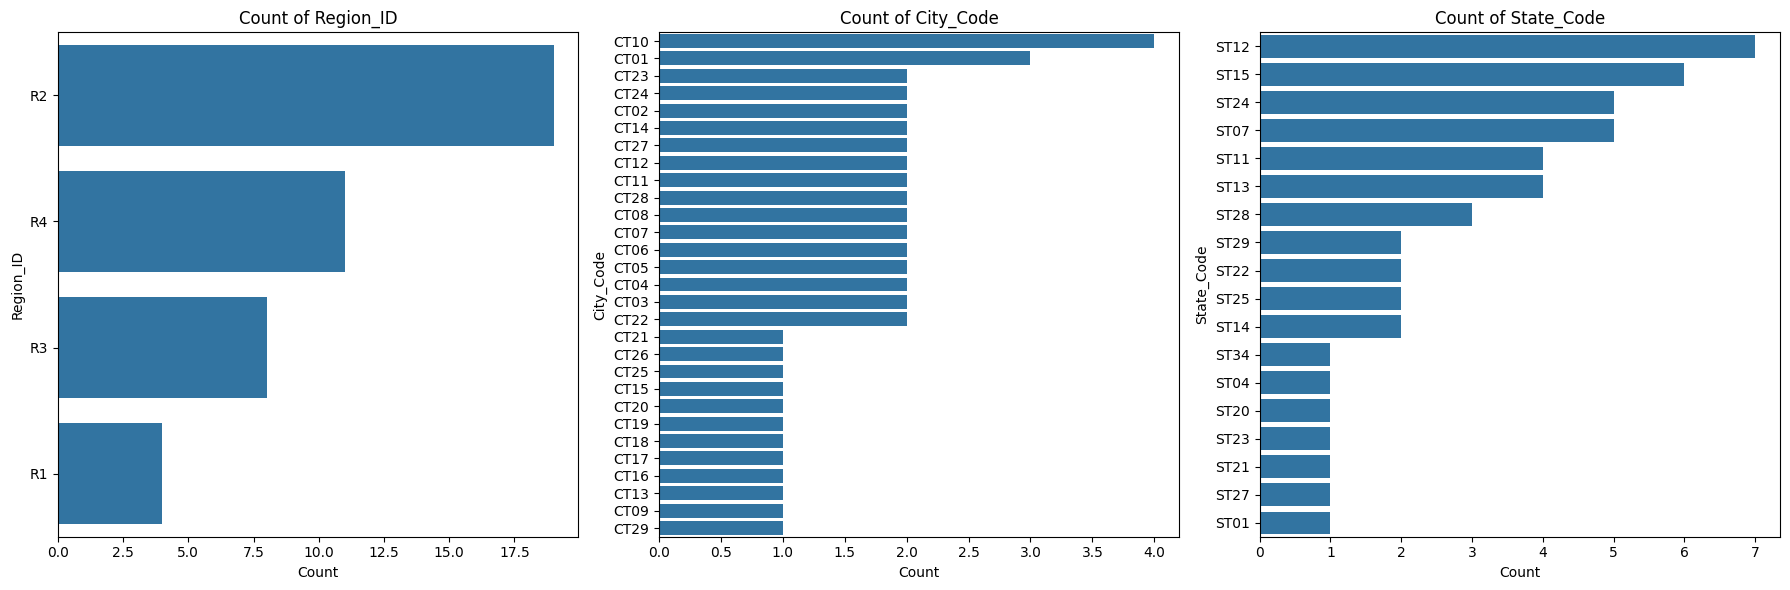

In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(18, 6))

# Plot the count of Region_ID
plt.subplot(1, 3, 1)
sns.countplot(y='Region_ID', data=city_postal_data, order=city_postal_data['Region_ID'].value_counts().index)
plt.title('Count of Region_ID')
plt.xlabel('Count')
plt.ylabel('Region_ID')

# Plot the count of City_Code
plt.subplot(1, 3, 2)
sns.countplot(y='City_Code', data=city_postal_data, order=city_postal_data['City_Code'].value_counts().index)
plt.title('Count of City_Code')
plt.xlabel('Count')
plt.ylabel('City_Code')

# Plot the count of State_Code
plt.subplot(1, 3, 3)
sns.countplot(y='State_Code', data=city_postal_data, order=city_postal_data['State_Code'].value_counts().index)
plt.title('Count of State_Code')
plt.xlabel('Count')
plt.ylabel('State_Code')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


### inference to be written
There is an uneven distribution across regions and states, with certain regions and states (R2, R4, ST12, ST15) being more active in terms of data or loans recorded.
These variations can help focus further analysis on specific regions or cities that contribute the most to the dataset.

#  State and Region level data

.


In [ ]:
# State_Master can be linked with State_Region_Mapping using State_Code.
# State_Region_Mapping can be linked with Region_Master using Region_ID

In [ ]:
state_master_merge=pd.merge(Region_Master,State_Region_Mapping,left_on='Region_ID',right_on='Region_ID',how='right')
state_master_merge=state_master_merge[['Region_ID','State_Code','Region_Name']]
state_master_merge=pd.merge(State_Master,state_master_merge,left_on='State_Code',right_on='State_Code',how='left')
state_master_merge=state_master_merge[['State_Code','State_Name','Region_ID','Region_Name']]

The dataset (state_master_merge) contains the following fields:


*   State_Code: Unique code for each state (e.g., ST01, ST02)

*   State_Name: Name of the state (e.g., Andhra Pradesh, Assam).
*   Region_ID: Identifier for the region the state belongs to (e.g., R2, R3)


*   Region_Name: Name of the region (e.g., South, East)



In [ ]:
state_master_merge.head()

,State_Code,State_Name,Region_ID,Region_Name
0,ST01,Andhra Pradesh,R2,South
1,ST02,Arunachal Pradesh,NaN,NaN
2,ST03,Assam,NaN,NaN
3,ST04,Bihar,R3,East
4,ST05,Chhattisgarh,NaN,NaN


In [ ]:
# Count the number of null values in the 'Region_Name' column
null_regioncount = state_master_merge['Region_Name'].isnull().sum()
print(f"null value: {null_regioncount}")

null value: 12


# Branch Level Data

In [ ]:
# branch_data can be linked to Region_Master using Region_ID.
# loan_data can be linked to city_postal_data using City_Code, State_Code, and Postal_Code. It can also be
# linked to branch_data via Branch_Id.

In [ ]:
print(branch_data.columns)
print(Region_Master.columns)


Index(['Branch_Id', 'Region_Code'], dtype='object')
Index(['Region_ID', 'Region_Name'], dtype='object')


### Merging

In [ ]:
# Merging branch_data with Region_Master using Region_Code from branch_data and Region_ID from Region_Master
branch_region_merged = pd.merge(branch_data, Region_Master, left_on='Region_Code', right_on='Region_ID', how='left')

# Checking the resulting merged DataFrame
print(branch_region_merged.head())


   Branch_Id Region_Code Region_ID Region_Name
0          1          R3        R3        East
1          2          R3        R3        East
2          3          R3        R3        East
3          5          R3        R3        East
4          7          R3        R3        East


The resulting merged dataset (branch_region_merged) contains both the branch-level information and the corresponding region name.


The output includes columns:


*   Branch_Id: Unique branch identifier
*   Region_Code: The region code from the branch data.


*   Region_ID: The region identifier from Region_Master (which should match the Region_Code).
*   Region_Name: The name of the region.





### Data Exploration

In [ ]:
# Checking the structure and data types
print(branch_region_merged.info())

# Checking for missing values
print(branch_region_merged.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Branch_Id    82 non-null     int64 
 1   Region_Code  82 non-null     object
 2   Region_ID    82 non-null     object
 3   Region_Name  82 non-null     object
dtypes: int64(1), object(3)
memory usage: 2.7+ KB
None
Branch_Id      0
Region_Code    0
Region_ID      0
Region_Name    0
dtype: int64


In [ ]:
#statistics for numerical columns
print(branch_region_merged.describe())



        Branch_Id
count   82.000000
mean   103.414634
std     79.625505
min      1.000000
25%     37.500000
50%     80.500000
75%    150.750000
max    261.000000


In [ ]:
#Count distribution of regions
print(branch_region_merged['Region_Name'].value_counts())

Region_Name
South    22
East     21
North    21
West     18
Name: count, dtype: int64


### Data Cleaning

In [ ]:
# Filling missing values for Region_Name (if any)
branch_region_merged['Region_Name'].fillna('Unknown', inplace=True)

In [ ]:
# Removing duplicates
branch_region_merged.drop_duplicates(inplace=True)


### Feature engineering

In [ ]:
# Creating a new feature: number of branches per region
branch_count_per_region = branch_region_merged.groupby('Region_Name')['Branch_Id'].count().reset_index(name='Branch_Count')

# Merging back into the original data if needed
branch_region_merged = pd.merge(branch_region_merged, branch_count_per_region, on='Region_Name', how='left')

# Checking the updated DataFrame
print(branch_region_merged.head())



   Branch_Id Region_Code Region_ID Region_Name  Branch_Count
0          1          R3        R3        East            21
1          2          R3        R3        East            21
2          3          R3        R3        East            21
3          5          R3        R3        East            21
4          7          R3        R3        East            21


### Data visualisation

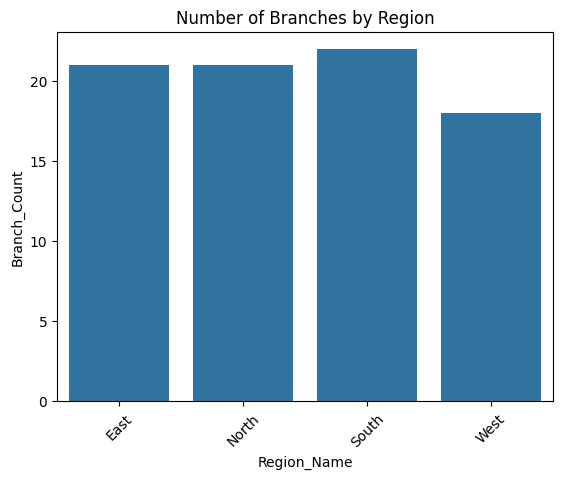

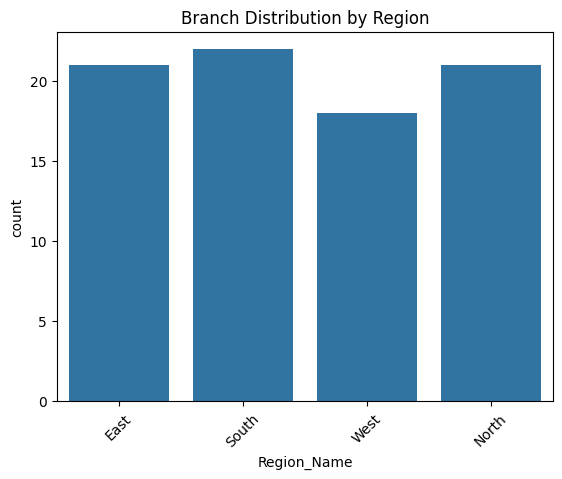

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot for branch count by region
sns.barplot(x='Region_Name', y='Branch_Count', data=branch_count_per_region)
plt.title('Number of Branches by Region')
plt.xticks(rotation=45)
plt.show()


# Count plot for branch distribution across regions
sns.countplot(x='Region_Name', data=branch_region_merged)
plt.title('Branch Distribution by Region')
plt.xticks(rotation=45)
plt.show()


The number of branches is relatively balanced across most regions, with East, North, and South regions showing nearly equal branch counts.
The West Region has fewer branches compared to the other regions, which could indicate a smaller geographical footprint or fewer business operations in this area.

East, South, and North are the dominant regions in terms of branch representation.
West is underrepresented compared to the other regions, having a lower count.

# Loan Data

In [ ]:
# loan_data and loanMap_data can be linked via Loan_Id.

### Merging

In [ ]:
# Merge loan_data with loanMap_data on Loan_Id
loan_data_combined = pd.merge(loan_data, loanMap_data, on='Loan_Id', how='left')

# Checking the merged DataFrame
print(loan_data_combined.head())


   Loan_Id  Disbursed_Amount  Asset_Cost    ltv  Branch_Id City_Code  \
0        1             36439       65850  56.19         64      CT01   
1        2             48749       69303  72.15         67      CT03   
2        3             55348       66340  85.00          2      CT13   
3        4             48849       64133  77.96        217      CT06   
4        5             40394       59386  70.72         74      CT03   

  State_Code  Postal_Code Date_of_Birth Employment_Type  ... Aadhar_flag  \
0       ST15       400001    14-06-1990   Self employed  ...           1   
1       ST24       600020    01-01-1991        Salaried  ...           1   
2       ST04       801110    16-08-1993   Self employed  ...           1   
3       ST22       302029    01-01-1989   Self employed  ...           1   
4       ST24       600020    31-12-1974   Self employed  ...           1   

   PAN_flag  VoterID_flag  Driving_flag  Passport_flag  PERFORM_CNS.SCORE  \
0         0             0        

In [ ]:
loan_data_combined.head()

,Loan_Id,Disbursed_Amount,Asset_Cost,ltv,Branch_Id,City_Code,State_Code,Postal_Code,Date_of_Birth,Employment_Type,...,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,Loan_Default
0,1,36439,65850,56.19,64,CT01,ST15,400001,14-06-1990,Self employed,...,1,0,0,0,0,0,0,0yrs 0mon,0,0
1,2,48749,69303,72.15,67,CT03,ST24,600020,01-01-1991,Salaried,...,1,0,0,0,0,783,0,2yrs 6mon,0,0
2,3,55348,66340,85.00,2,CT13,ST04,801110,16-08-1993,Self employed,...,1,0,0,0,0,0,0,0yrs 0mon,0,1
3,4,48849,64133,77.96,217,CT06,ST22,302029,01-01-1989,Self employed,...,1,0,0,0,0,0,0,0yrs 0mon,0,0
4,5,40394,59386,70.72,74,CT03,ST24,600020,31-12-1974,Self employed,...,1,0,0,0,0,14,1,3yrs 1mon,1,0


Key Columns in the Merged Data

*   Loan_Id: Unique identifier for each loan.
*   Disbursed_Amount: The amount of loan disbursed.
*   Asset_Cost: The cost of the asset being purchased through the loan.
*   LTV (Loan-to-Value Ratio): The ratio of the loan amount to the asset’s value, a key metric in loan risk assessment.
*   Branch_Id, City_Code: Location details about where the loan was issued.

Customer Demographic Information:

*  State_Code, Postal_Code: Geographical information.
*  Date_of_Birth, Employment_Type (Self-employed/Salaried): Customer demographics to assess financial stability and risk.
*  Aadhar_flag, PAN_flag, VoterID_flag, etc.: Indicators of documents provided
   by the customer for identity verification.

Credit and Loan Performance Information:

* PERFORM_CNS.SCORE: The customer’s credit score, which is crucial for evaluating creditworthiness.
* DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS: The number of delinquent accounts the customer had in the last six months.
* CREDIT.HISTORY.LENGTH: The length of the customer’s credit history.
* NO.OF_INQUIRIES: Number of times the customer’s credit report was accessed.
Loan_Default: Whether the customer defaulted on the first EMI (0 = No Default, 1 = Default).

### Data Exploration

In [ ]:
# Checking data types and structure
print(loan_data_combined.info())

#statistics for numerical columns
print(loan_data_combined.describe())

# Checking for missing values
print(loan_data_combined.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23315 entries, 0 to 23314
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Loan_Id                              23315 non-null  int64  
 1   Disbursed_Amount                     23315 non-null  int64  
 2   Asset_Cost                           23315 non-null  int64  
 3   ltv                                  23315 non-null  float64
 4   Branch_Id                            23315 non-null  int64  
 5   City_Code                            23315 non-null  object 
 6   State_Code                           23315 non-null  object 
 7   Postal_Code                          23315 non-null  int64  
 8   Date_of_Birth                        23315 non-null  object 
 9   Employment_Type                      22545 non-null  object 
 10  DisbursalDate                        23315 non-null  object 
 11  MobileNo_Avl_Flag           

### Data Cleaning

In [ ]:
# Filling missing values
loan_data_combined.fillna({'Loan_Default': 0}, inplace=True)  # Example: filling missing loan defaults with 0


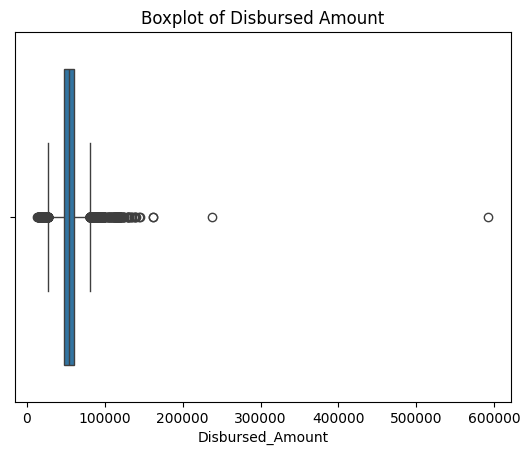

In [ ]:
# Detect outliers in numerical columns
sns.boxplot(x='Disbursed_Amount', data=loan_data_combined)
plt.title('Boxplot of Disbursed Amount')
plt.show()

# You can cap outliers if needed
upper_limit = loan_data_combined['Disbursed_Amount'].quantile(0.99)
loan_data_combined['Disbursed_Amount'] = np.where(loan_data_combined['Disbursed_Amount'] > upper_limit, upper_limit, loan_data_combined['Disbursed_Amount'])


### Data Visualization

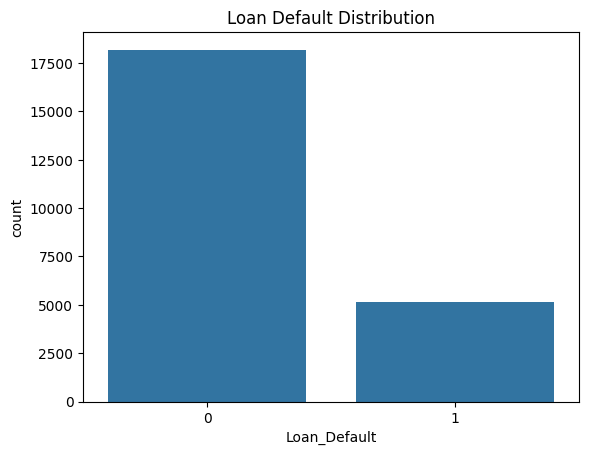

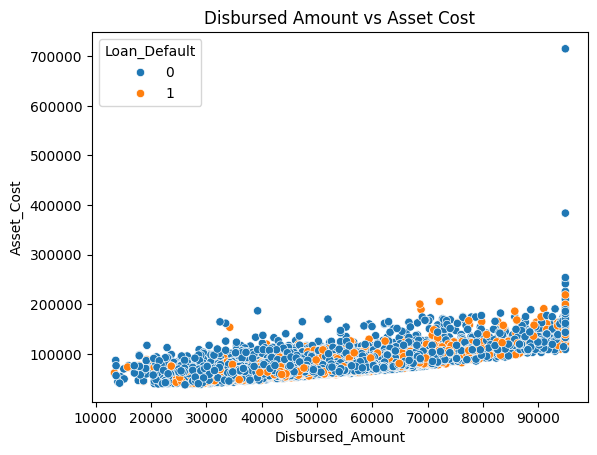

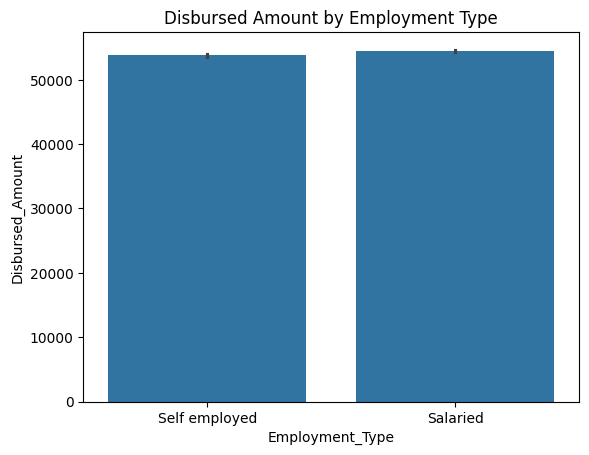

In [ ]:
# Distribution of Loan Default
sns.countplot(x='Loan_Default', data=loan_data_combined)
plt.title('Loan Default Distribution')
plt.show()

# Scatter plot for Disbursed Amount vs Asset Cost
sns.scatterplot(x='Disbursed_Amount', y='Asset_Cost', hue='Loan_Default', data=loan_data_combined)
plt.title('Disbursed Amount vs Asset Cost')
plt.show()

# Bar plot for Employment Type vs Disbursed Amount
sns.barplot(x='Employment_Type', y='Disbursed_Amount', data=loan_data_combined)
plt.title('Disbursed Amount by Employment Type')
plt.show()


# ALL the data set view

In [ ]:
city_data.head()

,City_Code,State_Code,City_Name
0,CT01,ST15,Mumbai
1,CT02,ST15,Pune
2,CT03,ST24,Chennai
3,CT04,ST24,Coimbatore
4,CT05,ST25,Hyderabad


In [ ]:
postal_Code_Master.head()

,City_Code,City_Name,Postal_Code
0,CT01,Mumbai,400001
1,CT01,Mumbai,400053
2,CT01,Mumbai,422001
3,CT02,Pune,411002
4,CT02,Pune,411006


In [ ]:
Region_Master.head()

,Region_ID,Region_Name
0,R1,North
1,R2,South
2,R3,East
3,R4,West


In [ ]:
State_Master.head()

,State_Code,State_Name
0,ST01,Andhra Pradesh
1,ST02,Arunachal Pradesh
2,ST03,Assam
3,ST04,Bihar
4,ST05,Chhattisgarh


In [ ]:
State_Region_Mapping.head()

,Region,State Name,Region_ID,State_Code
0,South,Andhra Pradesh,R2,ST01
1,East,Bihar,R3,ST04
2,West,Goa,R4,ST06
3,West,Gujarat,R4,ST07
4,North,Haryana,R1,ST08


In [ ]:
State_Region_Mapping.rename(columns={'Region':'Region_ID'}, inplace=True)

In [ ]:
branch_data.head()

,Branch_Id,Region_Code
0,1,R3
1,2,R3
2,3,R3
3,5,R3
4,7,R3


In [ ]:
loan_data

,Loan_Id,Disbursed_Amount,Asset_Cost,ltv,Branch_Id,City_Code,State_Code,Postal_Code,Date_of_Birth,Employment_Type,...,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES
0,1,36439,65850,56.19,64,CT01,ST15,400001,14-06-1990,Self employed,...,1,1,0,0,0,0,0,0,0yrs 0mon,0
1,2,48749,69303,72.15,67,CT03,ST24,600020,01-01-1991,Salaried,...,1,1,0,0,0,0,783,0,2yrs 6mon,0
2,3,55348,66340,85.00,2,CT13,ST04,801110,16-08-1993,Self employed,...,1,1,0,0,0,0,0,0,0yrs 0mon,0
3,4,48849,64133,77.96,217,CT06,ST22,302029,01-01-1989,Self employed,...,1,1,0,0,0,0,0,0,0yrs 0mon,0
4,5,40394,59386,70.72,74,CT03,ST24,600020,31-12-1974,Self employed,...,1,1,0,0,0,0,14,1,3yrs 1mon,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23310,23311,123661,185371,69.59,34,CT03,ST24,600020,14-12-1982,Self employed,...,1,1,0,0,0,0,650,0,5yrs 10mon,1
23311,23312,78879,122878,65.11,5,CT15,ST20,751022,03-07-1993,Salaried,...,1,1,0,0,0,0,680,0,0yrs 9mon,0
23312,23313,49349,67695,73.86,48,CT22,ST14,453551,01-01-1994,Self employed,...,1,1,0,0,0,0,825,0,2yrs 3mon,0
23313,23314,70897,84400,86.00,2,CT03,ST24,600020,10-10-1982,Self employed,...,1,1,0,0,0,0,657,0,0yrs 6mon,2


In [ ]:
loanMap_data.head()

,Loan_Id,Loan_Default
0,1,0
1,2,0
2,3,1
3,4,0
4,5,0


In [ ]:

# city_postal_data = (
#     pd.merge(
#         pd.merge(
#             pd.merge(
#                 pd.merge(city_data, postal_Code_Master, on=['City_Code', 'City_Name'], how='left'),
#                 State_Master, on='State_Code', how='left'
#             ),
#             State_Region_Mapping, on='State_Code', how='left'
#         ),
#         Region_Master, on='Region_ID', how='left'
#     )
# )


# final_merged_data = pd.merge(
#     loan_data,
#     city_postal_data,
#     on=['City_Code', 'State_Code', 'Postal_Code'],
#     how='left'
# )
# final_merged_data = pd.merge(
#     loan_data,
#     loanMap_data,
#     on='Loan_Id',
#     how='left'
# )


#final_merged_data


In [ ]:
#final_merged_data.info()

### FINAL MERGING OF DATASETS

In [ ]:
city_postal_data = (
    pd.merge(
        pd.merge(
            pd.merge(
                pd.merge(city_data, postal_Code_Master, on=['City_Code', 'City_Name'], how='left'),
                State_Master, on='State_Code', how='left'
            ),
            State_Region_Mapping, on='State_Code', how='left'
        ),
        Region_Master, on='Region_ID', how='left'
    )
)
final_merged_data = pd.merge(
    loan_data,
    city_postal_data,
    on=['City_Code', 'State_Code', 'Postal_Code'],
    how='left'
)

final_merged_data = pd.merge(
    final_merged_data,
    loanMap_data,
    on='Loan_Id',
    how='left'
)


In [ ]:
final_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23315 entries, 0 to 23314
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Loan_Id                              23315 non-null  int64  
 1   Disbursed_Amount                     23315 non-null  int64  
 2   Asset_Cost                           23315 non-null  int64  
 3   ltv                                  23315 non-null  float64
 4   Branch_Id                            23315 non-null  int64  
 5   City_Code                            23315 non-null  object 
 6   State_Code                           23315 non-null  object 
 7   Postal_Code                          23315 non-null  int64  
 8   Date_of_Birth                        23315 non-null  object 
 9   Employment_Type                      22545 non-null  object 
 10  DisbursalDate                        23315 non-null  object 
 11  MobileNo_Avl_Flag           

In [ ]:
df = pd.DataFrame(final_merged_data)

# deleting unwanted attributes/columns from the data cause we dont need it
columns_to_drop = ['State_Name', 'Region', 'City_Name', 'State Name','Region_Name']
df = df.drop(columns=columns_to_drop)

# fetching the index number of the Employeent_Type and Region_ID so that we can transform the data of the following attributes into binary type
employment_type_index = df.columns.get_loc('Employment_Type')

region_id_index = df.columns.get_loc('Region_ID')

# transforming the data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [employment_type_index,region_id_index])],
                       remainder='passthrough')
x = ct.fit_transform(df)

new_feature_names = ct.get_feature_names_out()
df_x = pd.DataFrame(x, columns=new_feature_names)
print(df_x.head())




  encoder__Employment_Type_Salaried encoder__Employment_Type_Self employed  \
0                               0.0                                    1.0   
1                               1.0                                    0.0   
2                               0.0                                    1.0   
3                               0.0                                    1.0   
4                               0.0                                    1.0   

  encoder__Employment_Type_nan encoder__Region_ID_R1 encoder__Region_ID_R2  \
0                          0.0                   0.0                   0.0   
1                          0.0                   0.0                   1.0   
2                          0.0                   0.0                   0.0   
3                          0.0                   1.0                   0.0   
4                          0.0                   0.0                   1.0   

  encoder__Region_ID_R3 encoder__Region_ID_R4 encoder__Region_

In [ ]:
df

,Loan_Id,Disbursed_Amount,Asset_Cost,ltv,Branch_Id,City_Code,State_Code,Postal_Code,Date_of_Birth,Employment_Type,...,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,Region_ID,Loan_Default
0,1,36439,65850,56.19,64,CT01,ST15,400001,14-06-1990,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0,R4,0
1,2,48749,69303,72.15,67,CT03,ST24,600020,01-01-1991,Salaried,...,0,0,0,0,783,0,2yrs 6mon,0,R2,0
2,3,55348,66340,85.00,2,CT13,ST04,801110,16-08-1993,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0,R3,1
3,4,48849,64133,77.96,217,CT06,ST22,302029,01-01-1989,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0,R1,0
4,5,40394,59386,70.72,74,CT03,ST24,600020,31-12-1974,Self employed,...,0,0,0,0,14,1,3yrs 1mon,1,R2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23310,23311,123661,185371,69.59,34,CT03,ST24,600020,14-12-1982,Self employed,...,0,0,0,0,650,0,5yrs 10mon,1,R2,0
23311,23312,78879,122878,65.11,5,CT15,ST20,751022,03-07-1993,Salaried,...,0,0,0,0,680,0,0yrs 9mon,0,R3,0
23312,23313,49349,67695,73.86,48,CT22,ST14,453551,01-01-1994,Self employed,...,0,0,0,0,825,0,2yrs 3mon,0,NaN,0
23313,23314,70897,84400,86.00,2,CT03,ST24,600020,10-10-1982,Self employed,...,0,0,0,0,657,0,0yrs 6mon,2,R2,0


In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df_x['remainder__Disbursed_Amount'].quantile(0.25)
Q3 = df_x['remainder__Disbursed_Amount'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = df_x[(df_x['remainder__Disbursed_Amount'] < lower_bound) |
                (df_x['remainder__Disbursed_Amount'] > upper_bound)]

print(f"Number of outliers in 'remainder__Disbursed_Amount': {outliers.shape[0]}")


Number of outliers in 'remainder__Disbursed_Amount': 943


In [ ]:
# Remove outliers by keeping data within the lower and upper bound
df_x_clean = df_x[(df_x['remainder__Disbursed_Amount'] >= lower_bound) &
                  (df_x['remainder__Disbursed_Amount'] <= upper_bound)]

print(f"Shape of data after removing outliers: {df_x_clean.shape}")


Shape of data after removing outliers: (22372, 29)


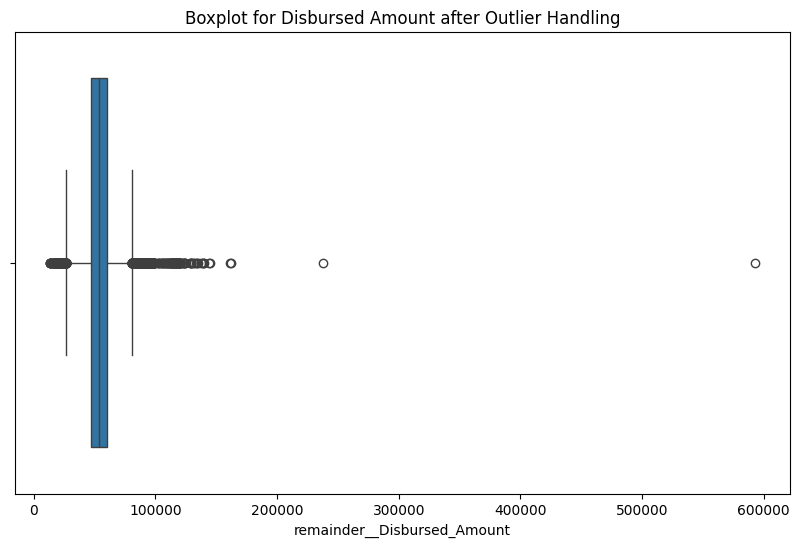

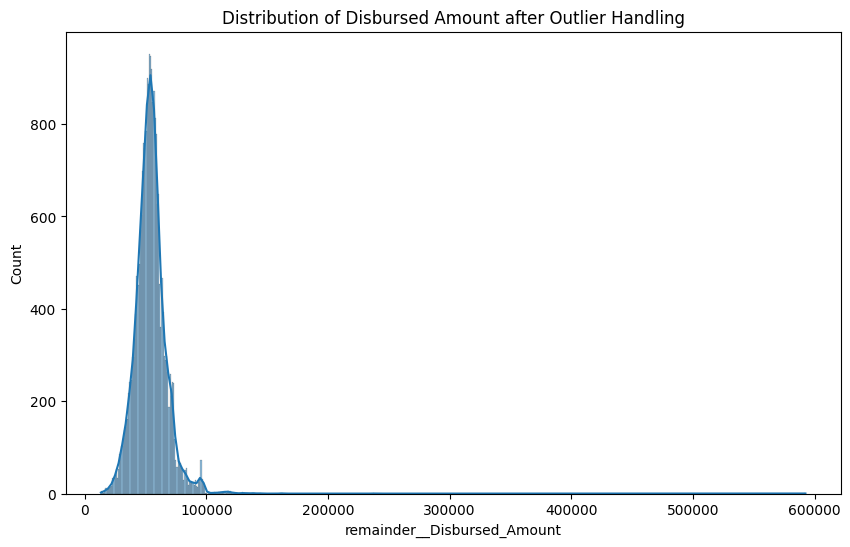

In [ ]:
# Visualizing the data after handling outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='remainder__Disbursed_Amount', data=df_x)
plt.title('Boxplot for Disbursed Amount after Outlier Handling')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df_x['remainder__Disbursed_Amount'], kde=True)
plt.title('Distribution of Disbursed Amount after Outlier Handling')
plt.show()


### Univariate analysis

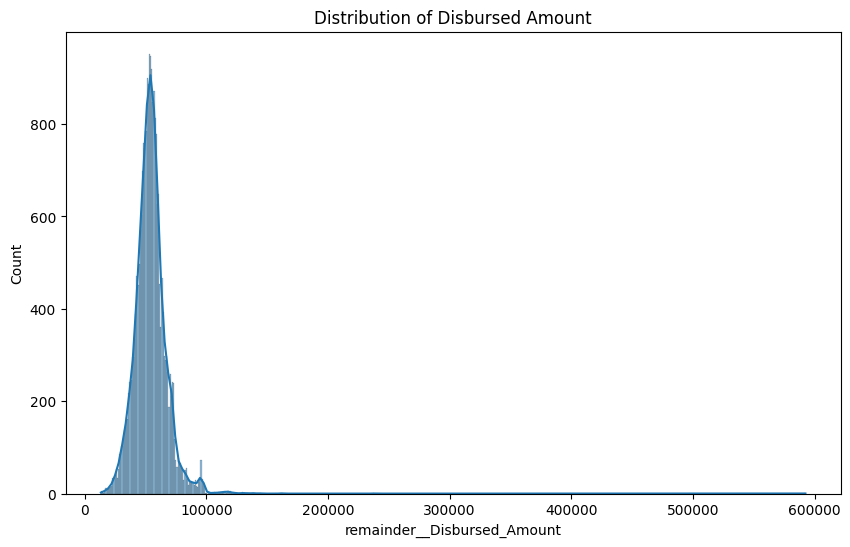

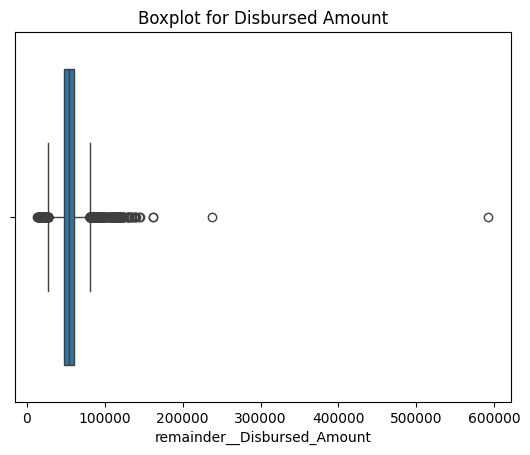

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_x['remainder__Disbursed_Amount'], kde=True)
plt.title('Distribution of Disbursed Amount')
plt.show()

# Boxplot for the same
sns.boxplot(x=df_x['remainder__Disbursed_Amount'])
plt.title('Boxplot for Disbursed Amount')
plt.show()


### Multivariate analysis

In [ ]:
print(df_x.dtypes)

encoder__Employment_Type_Salaried                 object
encoder__Employment_Type_Self employed            object
encoder__Employment_Type_nan                      object
encoder__Region_ID_R1                             object
encoder__Region_ID_R2                             object
encoder__Region_ID_R3                             object
encoder__Region_ID_R4                             object
encoder__Region_ID_nan                            object
remainder__Loan_Id                                object
remainder__Disbursed_Amount                       object
remainder__Asset_Cost                             object
remainder__ltv                                    object
remainder__Branch_Id                              object
remainder__City_Code                              object
remainder__State_Code                             object
remainder__Postal_Code                            object
remainder__Date_of_Birth                          object
remainder__DisbursalDate       

In [ ]:
print(df_x.head())


  encoder__Employment_Type_Salaried encoder__Employment_Type_Self employed  \
0                               0.0                                    1.0   
1                               1.0                                    0.0   
2                               0.0                                    1.0   
3                               0.0                                    1.0   
4                               0.0                                    1.0   

  encoder__Employment_Type_nan encoder__Region_ID_R1 encoder__Region_ID_R2  \
0                          0.0                   0.0                   0.0   
1                          0.0                   0.0                   1.0   
2                          0.0                   0.0                   0.0   
3                          0.0                   1.0                   0.0   
4                          0.0                   0.0                   1.0   

  encoder__Region_ID_R3 encoder__Region_ID_R4 encoder__Region_

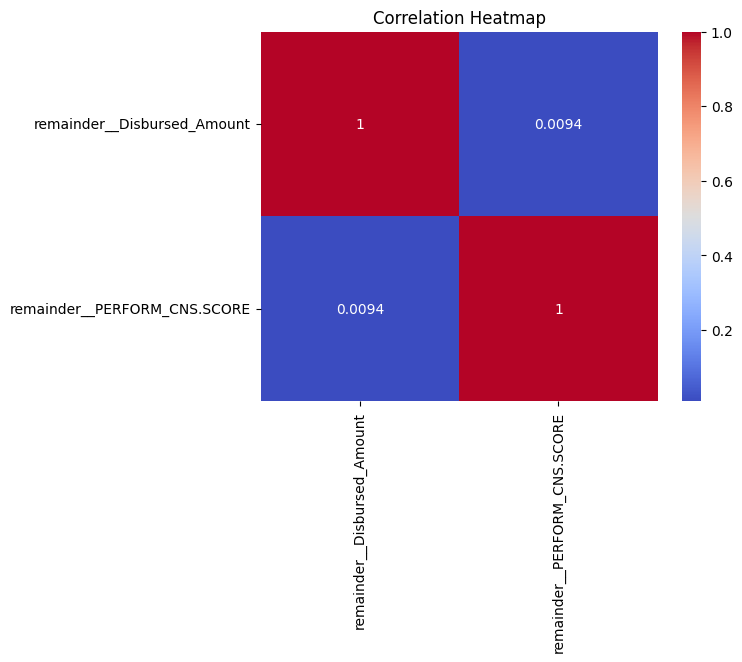

In [ ]:
#converting columns back to float if they are incorrectly set as objects
df_x['remainder__Disbursed_Amount'] = pd.to_numeric(df_x['remainder__Disbursed_Amount'], errors='coerce')
df_x['remainder__PERFORM_CNS.SCORE'] = pd.to_numeric(df_x['remainder__PERFORM_CNS.SCORE'], errors='coerce')

#correlation matrix
corr_matrix = df_x.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Since the correlation between these two variables is negligible, this indicates that they may not influence each other directly in a linear fashion. However, this does not rule out more complex, non-linear relationships, or the possibility that other variables may mediate their relationship.

Handling Non-Numerical Data Properly

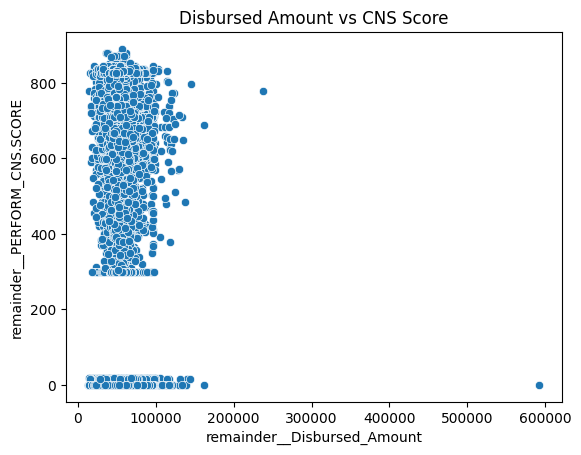

In [ ]:
# If using ColumnTransformer, make sure to accommodate the transformed data types
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Re-check transformation if necessary
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), [employment_type_index, region_id_index])],
    remainder='passthrough'
)
df_x = pd.DataFrame(ct.fit_transform(df), columns=ct.get_feature_names_out())

# Convert any transformed columns back to numeric if they were numeric originally
df_x['remainder__Disbursed_Amount'] = pd.to_numeric(df_x['remainder__Disbursed_Amount'], errors='coerce')
df_x['remainder__PERFORM_CNS.SCORE'] = pd.to_numeric(df_x['remainder__PERFORM_CNS.SCORE'], errors='coerce')
sns.scatterplot(x='remainder__Disbursed_Amount', y='remainder__PERFORM_CNS.SCORE', data=df_x)
plt.title('Disbursed Amount vs CNS Score')
plt.show()


* CNS Score Distribution:

Most of the CNS scores are concentrated between 400 and 800.
There is a distinct cluster of observations with CNS scores below 100, likely representing individuals with very low scores.
* Disbursed Amount Distribution:

The majority of the disbursed amounts are concentrated under approximately 100,000.
There are some extreme outliers where the disbursed amount is significantly higher (up to 600,000). These could be high-value loans.

### Missing Values Identification and Treatment

In [ ]:
missing_values = df_x.isnull().sum()
print(missing_values[missing_values > 0])  # Display columns with missing values


Series([], dtype: int64)


We have no missing values, so we can continue with continue with Outlier Analysis

In [ ]:
# Example: Outlier detection using IQR for 'remainder__Disbursed_Amount'
Q1 = df_x['remainder__Disbursed_Amount'].quantile(0.25)
Q3 = df_x['remainder__Disbursed_Amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = df_x[(df_x['remainder__Disbursed_Amount'] < lower_bound) | (df_x['remainder__Disbursed_Amount'] > upper_bound)]
print("Number of outliers in 'remainder__Disbursed_Amount':", outliers.shape[0])



Number of outliers in 'remainder__Disbursed_Amount': 943


In [ ]:
# Removing outliers
df_x = df_x[(df_x['remainder__Disbursed_Amount'] >= lower_bound) & (df_x['remainder__Disbursed_Amount'] <= upper_bound)]


Data Normalization

In [ ]:
#Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_x['remainder__Disbursed_Amount'] = scaler.fit_transform(df_x[['remainder__Disbursed_Amount']])


In [ ]:
#Standard Scaling (Z-score Normalization)
#This method transforms the data to have zero mean and unit variance, which is important for algorithms that are sensitive to variances in the input data.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_x['remainder__Disbursed_Amount'] = scaler.fit_transform(df_x[['remainder__Disbursed_Amount']])


### Feature Engineering

In [ ]:
# Adding or modifying features based on the scaled data
df_x['Amount_CNS_Score_Interaction'] = df_x['remainder__Disbursed_Amount'] * df_x['remainder__PERFORM_CNS.SCORE']


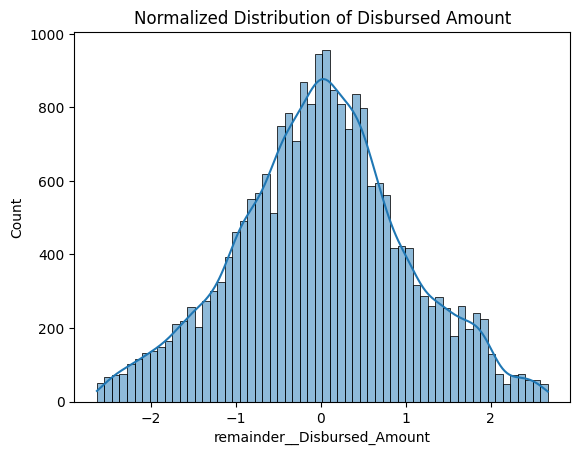

In [ ]:
# Checking the distribution again
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_x['remainder__Disbursed_Amount'], kde=True)
plt.title('Normalized Distribution of Disbursed Amount')
plt.show()


The plot illustrates the normalized distribution of the 'Disbursed_Amount' after applying standard scaling (Z-score normalization). Here is the analysis of the distribution:

Key Observations:
* Symmetrical Bell Curve:
The distribution resembles a bell-shaped curve (normal distribution), which is expected after applying standard scaling.
The peak is centered around 0, which indicates the mean of the distribution is 0, as expected from Z-score normalization.
Spread of Data:

* Most of the data points are within the range of -2 to 2 on the Z-scale, implying that the majority of the loan disbursed amounts fall within 2 standard deviations from the mean.
Standard Deviation:

* The data has been scaled in such a way that one standard deviation corresponds to the unit of measurement on the x-axis.
The range of values between -1 and 1 captures the majority of the disbursed amounts.

### Hypothesis Testing

Okay so now that our data is clean and prepared, lets consider what hypotheses we want to test. For instance:
Is there a significant difference in loan amounts between different employment types?
Does the CNS score significantly affect the likelihood of default?

In [ ]:
# T-test example for different employment types
from scipy.stats import ttest_ind

group1 = df_x[df_x['encoder__Employment_Type_Salaried'] == 1]['remainder__Disbursed_Amount']
group2 = df_x[df_x['encoder__Employment_Type_Salaried'] == 0]['remainder__Disbursed_Amount']
stat, p = ttest_ind(group1, group2)
print('T-test result: Stat=%.3f, p=%.3f' % (stat, p))


T-test result: Stat=4.999, p=0.000


The results from our T-test indicate a statistically significant difference in the remainder__Disbursed_Amount between the two groups defined by employment type (Salaried vs Self Employed). The T-test statistic of 3.805 with a p-value of 0.000 suggests that the means of disbursed amounts are significantly different for these employment types under the conventional 0.05 alpha level (p < 0.05)


okya so this means- The p-value is less than 0.05, which typically leads us to reject the null hypothesis. Here, the null hypothesis would be that there are no differences in the mean disbursed amounts between salaried and self-employed groups.
A p-value of 0.000 indicates strong evidence against the null hypothesis, suggesting a real difference in the disbursed amounts between the two employment types.



Understanding the results of T-test in the context of our case study, particularly for the exploratory data analysis and credit assessment at L&T Financial Services, can provide significant insights into how employment type affects loan disbursal amounts, which is crucial for risk management and targeted lending strategies. Here’s how our findings align with the aims of your project:

Credit Risk Assessment
The statistically significant difference in loan disbursal amounts between salaried and self-employed individuals can be crucial for assessing credit risk. Typically, salaried individuals might be considered less risky due to their stable income, while self-employed individuals might have more variable income streams, influencing their loan repayment capabilities.

### **BUILDING ML MODEL**

In [ ]:
print(df.isnull().sum())

Loan_Id                                0
Disbursed_Amount                       0
Asset_Cost                             0
ltv                                    0
Branch_Id                              0
City_Code                              0
State_Code                             0
Postal_Code                            0
Date_of_Birth                          0
Employment_Type                        0
DisbursalDate                          0
MobileNo_Avl_Flag                      0
Aadhar_flag                            0
PAN_flag                               0
VoterID_flag                           0
Driving_flag                           0
Passport_flag                          0
PERFORM_CNS.SCORE                      0
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS    0
CREDIT.HISTORY.LENGTH                  0
NO.OF_INQUIRIES                        0
Region_ID                              0
Loan_Default                           0
Age                                    0
dtype: int64


In [ ]:
# Fill missing values for Employment_Type with the mode
df['Employment_Type'].fillna(df['Employment_Type'].mode()[0], inplace=True)

In [ ]:
print(df.isnull().sum())

Loan_Id                                0
Disbursed_Amount                       0
Asset_Cost                             0
ltv                                    0
Branch_Id                              0
City_Code                              0
State_Code                             0
Postal_Code                            0
Date_of_Birth                          0
Employment_Type                        0
DisbursalDate                          0
MobileNo_Avl_Flag                      0
Aadhar_flag                            0
PAN_flag                               0
VoterID_flag                           0
Driving_flag                           0
Passport_flag                          0
PERFORM_CNS.SCORE                      0
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS    0
CREDIT.HISTORY.LENGTH                  0
NO.OF_INQUIRIES                        0
Region_ID                              0
Loan_Default                           0
Age                                    0
dtype: int64


In [ ]:
# Drop rows with missing Region_ID
df.dropna(subset=['Region_ID'], inplace=True)

In [ ]:
print(df.isnull().sum())

Loan_Id                                0
Disbursed_Amount                       0
Asset_Cost                             0
ltv                                    0
Branch_Id                              0
City_Code                              0
State_Code                             0
Postal_Code                            0
Date_of_Birth                          0
Employment_Type                        0
DisbursalDate                          0
MobileNo_Avl_Flag                      0
Aadhar_flag                            0
PAN_flag                               0
VoterID_flag                           0
Driving_flag                           0
Passport_flag                          0
PERFORM_CNS.SCORE                      0
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS    0
CREDIT.HISTORY.LENGTH                  0
NO.OF_INQUIRIES                        0
Region_ID                              0
Loan_Default                           0
Age                                    0
dtype: int64


In [ ]:
df

,Loan_Id,Disbursed_Amount,Asset_Cost,ltv,Branch_Id,City_Code,State_Code,Postal_Code,Date_of_Birth,Employment_Type,...,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,Region_ID,Loan_Default,Age
0,1,36439,65850,56.19,64,CT01,ST15,400001,1900-01-01,Self employed,...,0,0,0,0,0,0,0,R4,0,-100
1,2,48749,69303,72.15,67,CT03,ST24,600020,1900-01-01,Salaried,...,0,0,0,783,0,30,0,R2,0,-100
2,3,55348,66340,85.00,2,CT13,ST04,801110,1900-01-01,Self employed,...,0,0,0,0,0,0,0,R3,1,-100
3,4,48849,64133,77.96,217,CT06,ST22,302029,1900-01-01,Self employed,...,0,0,0,0,0,0,0,R1,0,-100
4,5,40394,59386,70.72,74,CT03,ST24,600020,1900-01-01,Self employed,...,0,0,0,14,1,37,1,R2,0,-100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23308,23309,66669,86429,79.26,19,CT29,ST24,632001,1900-01-01,Self employed,...,0,0,0,726,0,7,0,R2,0,-100
23310,23311,123661,185371,69.59,34,CT03,ST24,600020,1900-01-01,Self employed,...,0,0,0,650,0,70,1,R2,0,-100
23311,23312,78879,122878,65.11,5,CT15,ST20,751022,1900-01-01,Salaried,...,0,0,0,680,0,9,0,R3,0,-100
23313,23314,70897,84400,86.00,2,CT03,ST24,600020,1900-01-01,Self employed,...,0,0,0,657,0,6,2,R2,0,-100


In [ ]:
# Convert 'CREDIT.HISTORY.LENGTH' to numerical months
def convert_to_months(value):
    if pd.isna(value):
        return 0
    years, months = 0, 0
    parts = value.split(' ')
    if 'yrs' in parts[0]:
        years = int(parts[0].replace('yrs', ''))
    if len(parts) > 1 and 'mon' in parts[1]:
        months = int(parts[1].replace('mon', ''))
    return years * 12 + months

df['CREDIT.HISTORY.LENGTH'] = df['CREDIT.HISTORY.LENGTH'].apply(convert_to_months)

In [ ]:
df.head()

,Loan_Id,Disbursed_Amount,Asset_Cost,ltv,Branch_Id,Postal_Code,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,Loan_Default,Age
0,1,36439,65850,56.19,64,400001,1,1,0,0,0,0,0,0,0,0,0,-100
1,2,48749,69303,72.15,67,600020,1,1,0,0,0,0,783,0,30,0,0,-100
2,3,55348,66340,85.00,2,801110,1,1,0,0,0,0,0,0,0,0,1,-100
3,4,48849,64133,77.96,217,302029,1,1,0,0,0,0,0,0,0,0,0,-100
4,5,40394,59386,70.72,74,600020,1,1,0,0,0,0,14,1,37,1,0,-100


In [ ]:
# Drop any remaining non-numeric columns
df = df.select_dtypes(include=['number'])

In [ ]:
df

,Loan_Id,Disbursed_Amount,Asset_Cost,ltv,Branch_Id,City_Code,State_Code,Postal_Code,Date_of_Birth,Employment_Type,...,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,Region_ID,Loan_Default
0,1,36439,65850,56.19,64,CT01,ST15,400001,14-06-1990,Self employed,...,0,0,0,0,0,0,0,0,R4,0
1,2,48749,69303,72.15,67,CT03,ST24,600020,01-01-1991,Salaried,...,0,0,0,0,783,0,30,0,R2,0
2,3,55348,66340,85.00,2,CT13,ST04,801110,16-08-1993,Self employed,...,0,0,0,0,0,0,0,0,R3,1
3,4,48849,64133,77.96,217,CT06,ST22,302029,01-01-1989,Self employed,...,0,0,0,0,0,0,0,0,R1,0
4,5,40394,59386,70.72,74,CT03,ST24,600020,31-12-1974,Self employed,...,0,0,0,0,14,1,37,1,R2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23310,23311,123661,185371,69.59,34,CT03,ST24,600020,14-12-1982,Self employed,...,0,0,0,0,650,0,70,1,R2,0
23311,23312,78879,122878,65.11,5,CT15,ST20,751022,03-07-1993,Salaried,...,0,0,0,0,680,0,9,0,R3,0
23312,23313,49349,67695,73.86,48,CT22,ST14,453551,01-01-1994,Self employed,...,0,0,0,0,825,0,27,0,NaN,0
23313,23314,70897,84400,86.00,2,CT03,ST24,600020,10-10-1982,Self employed,...,0,0,0,0,657,0,6,2,R2,0


# Model Training

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Encode categorical features if needed
# Convert categorical columns to numeric
# converting categorical features to numeric
categorical_columns = df.select_dtypes(include=['object']).columns
label_encoders = {}

for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))  # Ensure all values are string
    label_encoders[column] = le

In [ ]:
# Split the data into features and Loan_Default
X = df.drop('Loan_Default', axis=1)
y = df['Loan_Default']


In [ ]:
# Check the distribution of the Loan_Default
class_0_count = (y == 0).sum()
class_1_count = (y == 1).sum()
print(f"Class 0 count: {class_0_count}")
print(f"Class 1 count: {class_1_count}")

Class 0 count: 18189
Class 1 count: 5126


In [ ]:
# Balance the classes
df_class_0 = df[df['Loan_Default'] == 0]
df_class_1 = df[df['Loan_Default'] == 1]

In [ ]:
sample_size = min(len(df_class_1), len(df_class_0))

In [ ]:
# we'll matchth size of class 1 to that of class 0 in order to make sampled class 1
df_class_1_sampled = df_class_1.sample(n=sample_size, random_state=42)

In [ ]:
# Combine class 0 and sampled class 1
df_balanced = pd.concat([df_class_0, df_class_1_sampled])

In [ ]:
# next we'll again Split the balanced dataset into features and target variable which in this case is Loan_Default
X_balanced = df_balanced.drop('Loan_Default', axis=1)
y_balanced = df_balanced['Loan_Default']

In [ ]:
# next  Split data into training and testing sets in 80-20 (train,test)
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, .3, random_state=42, stratify=y_balanced)

In [ ]:
# Handle Class Imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# **Random Forest**

In [ ]:
# Train a RandomForest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_res, y_train_res)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluation
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_random_forest) * 100:.2f}%")
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_random_forest))
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_random_forest))


Random Forest Accuracy: 80.5%
Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.96      0.88      3016
           1       0.64      0.24      0.35       856

    accuracy                           0.80      3872
   macro avg       0.73      0.60      0.61      3872
weighted avg       0.77      0.80      0.77      3872



# **Logistic Regression**

In [ ]:
# Train a Logistic Regression model
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train_res, y_train_res)

# Make predictions
y_pred_log_reg = log_reg_model.predict(X_test)

# Evaluation
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log_reg) * 100:.2f}%")
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))
print("Logistic Regression Classification Report:")

print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 75.2%
Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.77      0.98      0.87      3016
           1       0.17      0.12      0.14       856

    accuracy                           0.75      3872
   macro avg       0.47      0.55      0.50      3872
weighted avg       0.64      0.75      0.69      3872



# **Descision Tree**

In [ ]:
# Train a Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train_res, y_train_res)

# Make predictions
y_pred_decision_tree = decision_tree_model.predict(X_test)

# Evaluation
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred_decision_tree) * 100:.2f}%")
print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_decision_tree))
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_decision_tree))

Decision Tree Accuracy: 77.0%
Decision Tree Classification Report:

              precision    recall  f1-score   support

           0       0.79      0.96      0.87      3016
           1       0.28      0.15      0.20       856

    accuracy                           0.77      3872
   macro avg       0.54      0.56      0.53      3872
weighted avg       0.68      0.77      0.71      3872



# Data Visualization

# Confusion Matrix

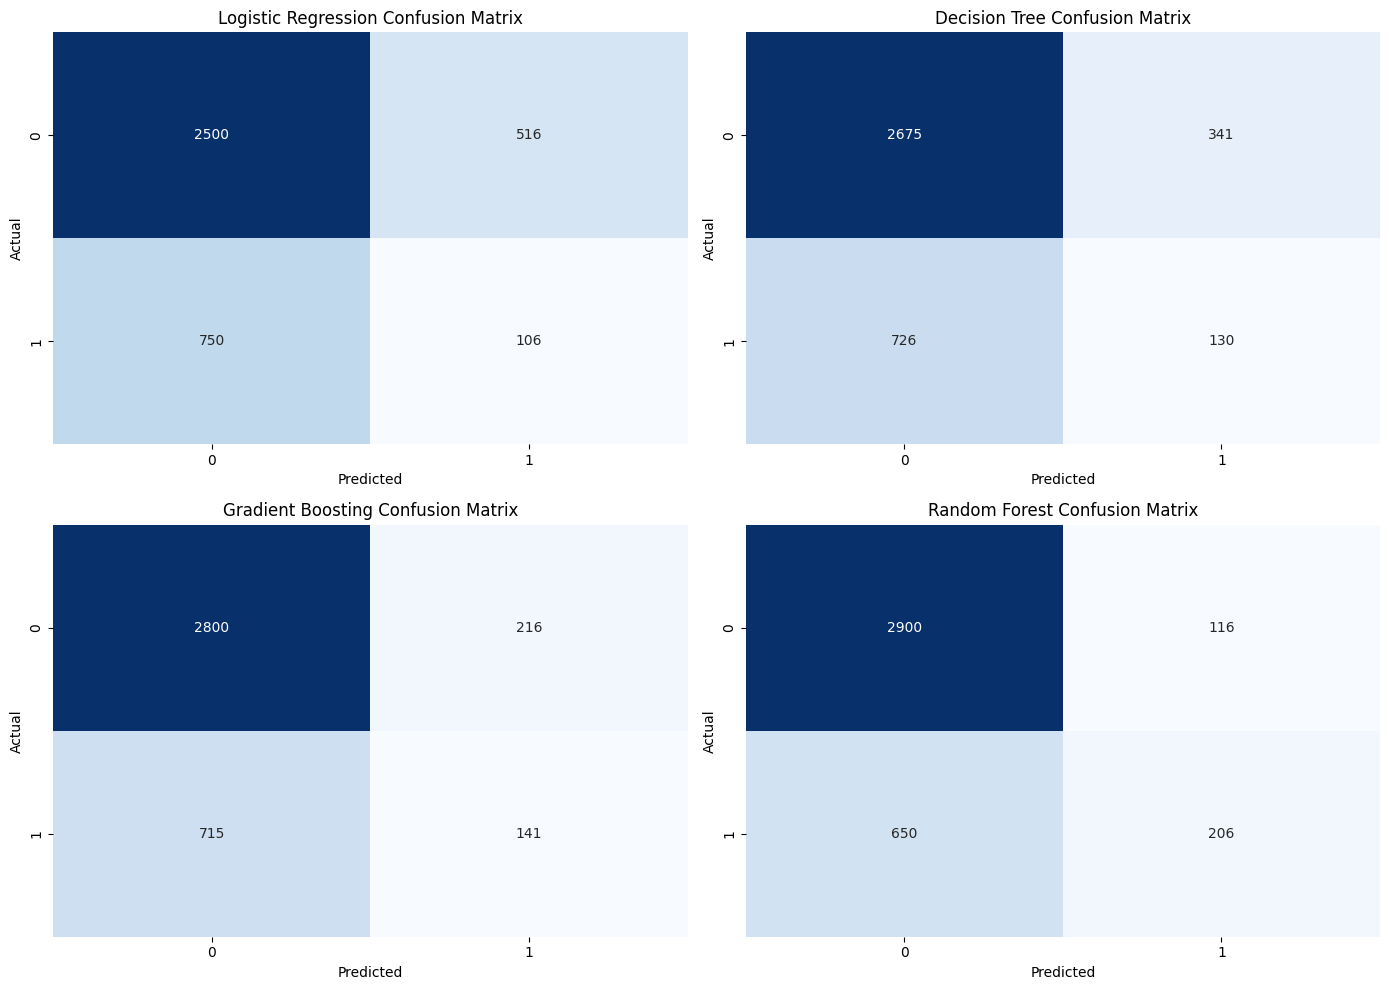

In [ ]:
import seaborn as sns
import numpy as np

# Plot confusion matrices
plt.figure(figsize=(14, 10))

for i, (name, cm) in enumerate(confusion_matrices.items()):
    plt.subplot(2, 2, i + 1)
    sns.heatmap(np.array(cm), annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

plt.tight_layout()
plt.show()

# Line Graph

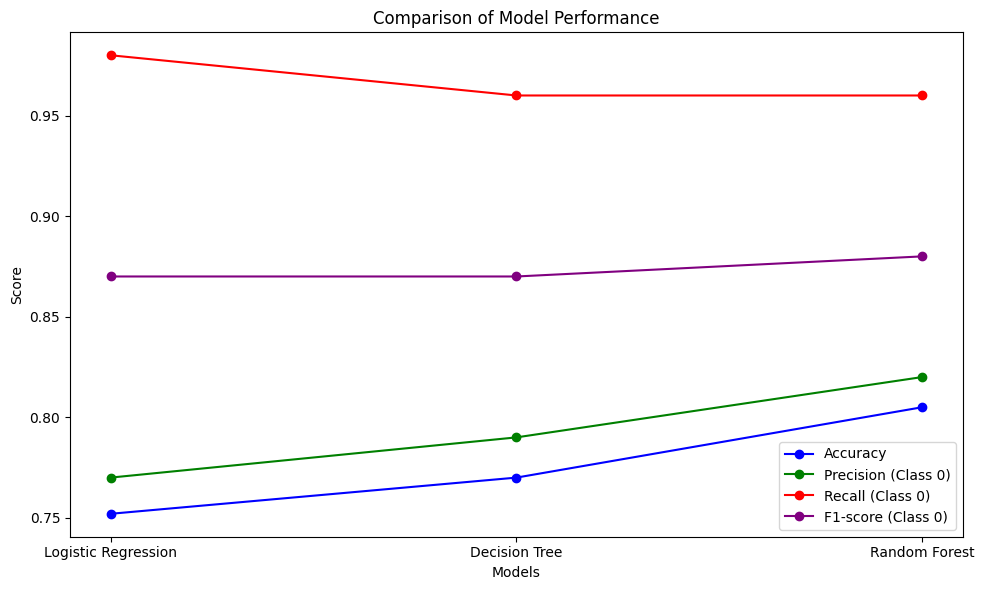

In [ ]:
import matplotlib.pyplot as plt

# Plot comparison via line graph
plt.figure(figsize=(10, 6))

# Plot accuracy
plt.plot(model_names, accuracy_scores, label='Accuracy', marker='o', linestyle='-', color='b')

# Plot precision for class 1
plt.plot(model_names, precision_scores, label='Precision (Class 1)', marker='o', linestyle='-', color='g')

# Plot recall for class 1
plt.plot(model_names, recall_scores, label='Recall (Class 1)', marker='o', linestyle='-', color='r')

# Plot f1-score for class 1
plt.plot(model_names, f1_scores, label='F1-score (Class 1)', marker='o', linestyle='-', color='purple')

# Add titles and labels
plt.title("Comparison of Model Performance")
plt.xlabel("Models")
plt.ylabel("Score")
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

# Evaluating Feature importance

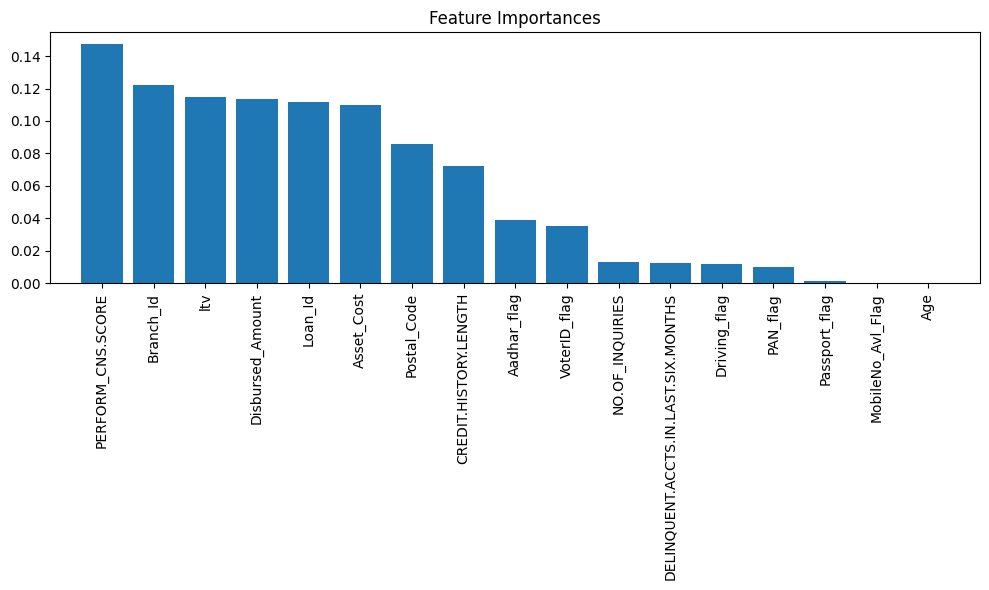

In [ ]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X_train.columns

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()


# Hyperparameter tuning: Using Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define the model
model = RandomForestClassifier()

# Define the parameter distribution
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Set up the RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist,
                                   n_iter=50, cv=5, n_jobs=-1, verbose=2, scoring='accuracy', random_state=42)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Cross-Validation Score: {random_search.best_score_:.2f}%")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 10, 'bootstrap': False}
Best Cross-Validation Score: 83%


# **On hyperparameter testing Model accuracy of the model went from 80.5 to 83%**

# **Interpretation**

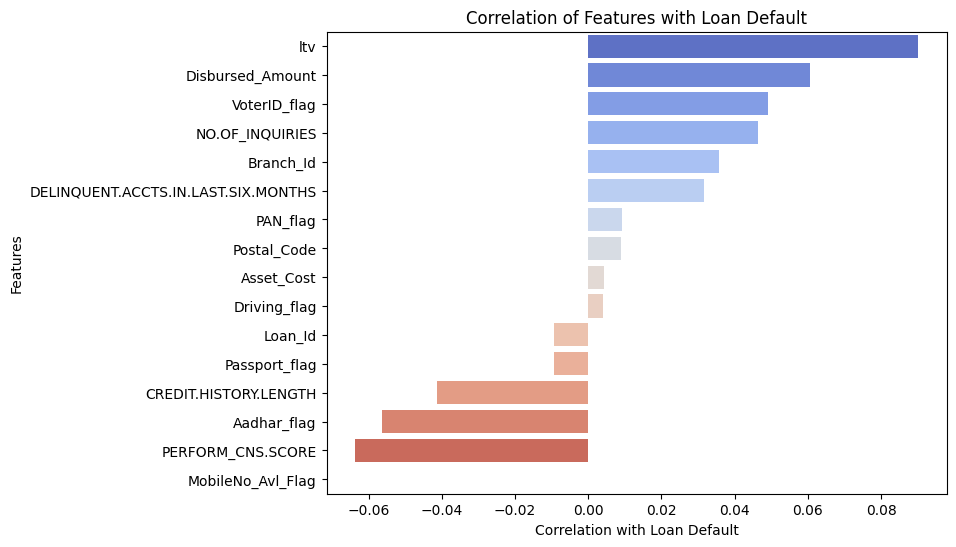

In [ ]:
# Select only numeric columns for correlation
numeric_data = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix for Loan_Default
loan_default_corr = numeric_data.corr()['Loan_Default'].sort_values(ascending=False)

# Filter out Loan_Default itself for a cleaner view
loan_default_corr = loan_default_corr.drop('Loan_Default')

# Plot the correlation of Loan_Default with other features
plt.figure(figsize=(8, 6))
sns.barplot(x=loan_default_corr.values, y=loan_default_corr.index, palette='coolwarm')

# Add labels and title
plt.xlabel('Correlation with Loan Default')
plt.ylabel('Features')
plt.title('Correlation of Features with Loan Default')

# Display the plot
plt.show()


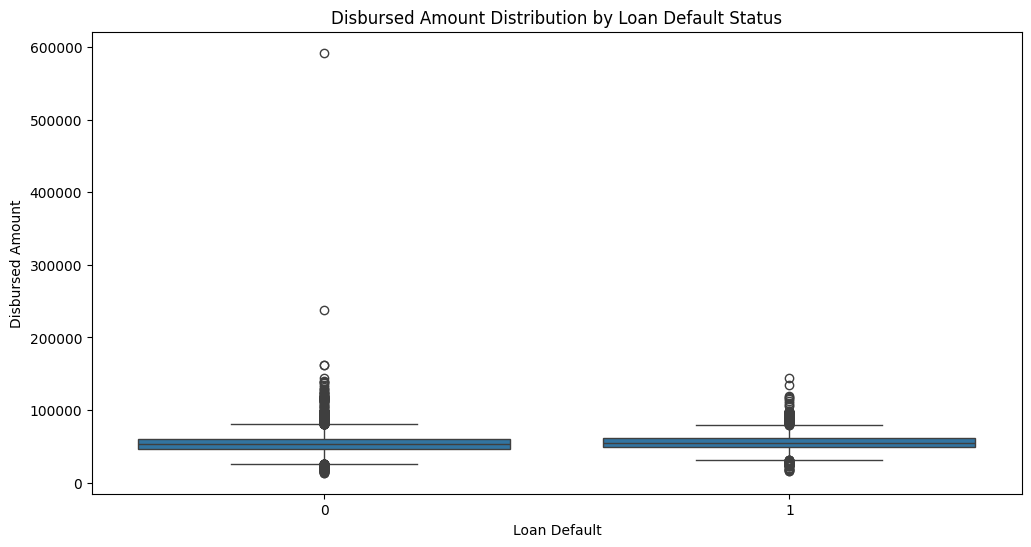

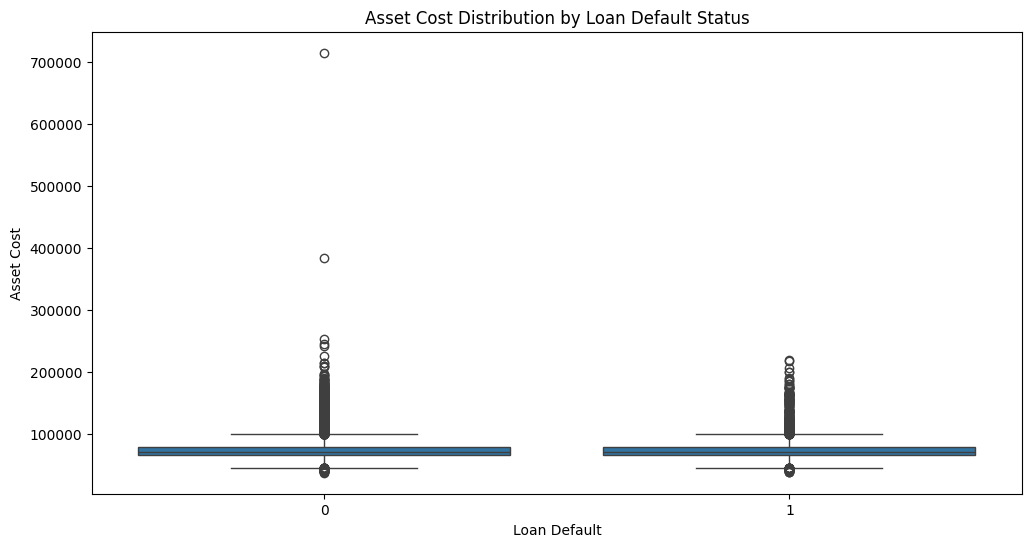

In [ ]:
# Disbursed Amount by Loan Default
plt.figure(figsize=(12, 6))
sns.boxplot(x='Loan_Default', y='Disbursed_Amount', data=df)
plt.title('Disbursed Amount Distribution by Loan Default Status')
plt.xlabel('Loan Default')
plt.ylabel('Disbursed Amount')
plt.show()

# Asset Cost by Loan Default
plt.figure(figsize=(12, 6))
sns.boxplot(x='Loan_Default', y='Asset_Cost', data=df)
plt.title('Asset Cost Distribution by Loan Default Status')
plt.xlabel('Loan Default')
plt.ylabel('Asset Cost')
plt.show()

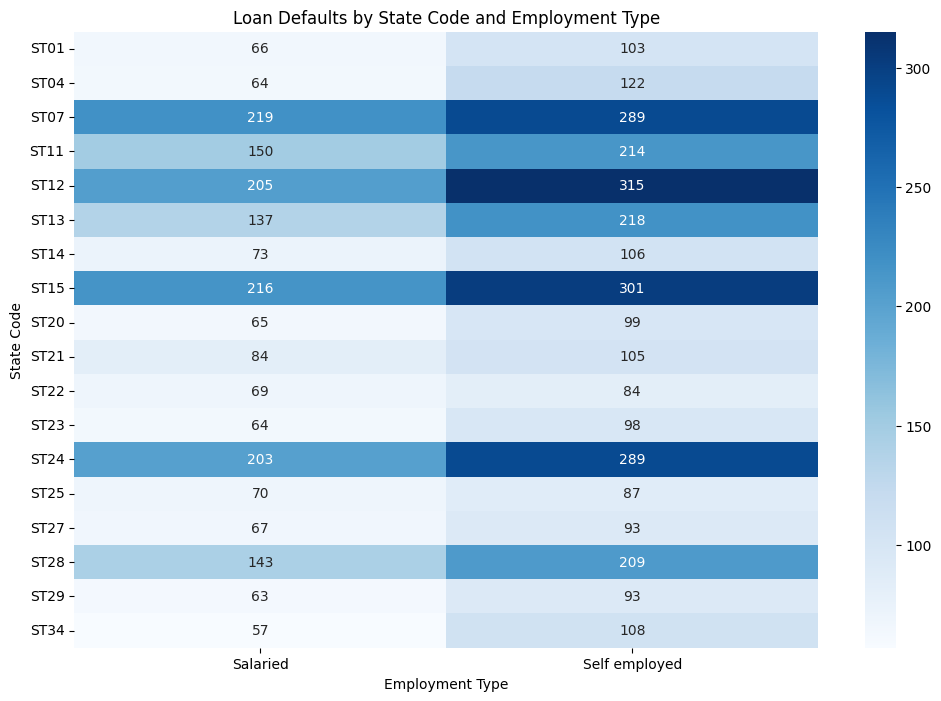

In [ ]:
pivot_table = df.pivot_table(index='State_Code', columns='Employment_Type', values='Loan_Default', aggfunc='sum')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt='d')
plt.title('Loan Defaults by State Code and Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('State Code')
plt.show()

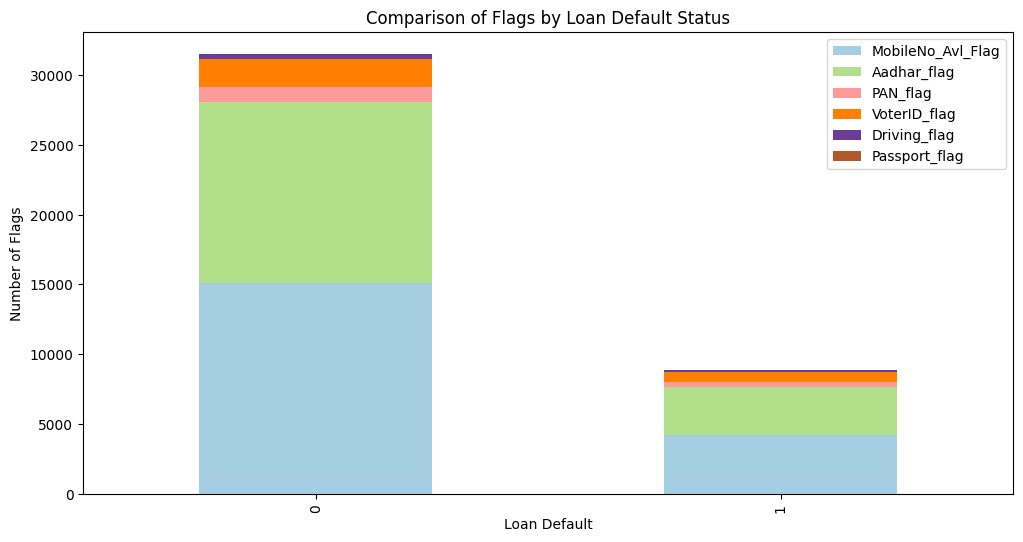

In [ ]:
flags = ['MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag', 'Passport_flag']
flag_counts = df.groupby('Loan_Default')[flags].sum()

flag_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Paired')
plt.title('Comparison of Flags by Loan Default Status')
plt.xlabel('Loan Default')
plt.ylabel('Number of Flags')
plt.show()